# Laboratorio 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Leer el archivo e ingresarlo en un numpy array

In [2]:
df = pd.read_csv('kc_house_data.csv')
x = np.array(df.loc[:,['sqft_living']].copy())
y = np.array(df.loc[:,['price']].copy())

## 2. Implementar el descenso del gradiente 

Computar el algoritmo

In [3]:
def linear_cost(X, y, theta):
    h = X @ theta
    return ((h - y) ** 2).sum() / (2*len(X))

def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / (2*len(X))

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate, threshold,
    max_iter=1000
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))
        thetas.append(theta.copy())

    return theta, costs, thetas


## 3. Determinar el mejor modelo con Cross Validation

In [4]:
np.random.shuffle(x)
np.random.shuffle(y)

In [5]:
r1 = round(x.shape[0]*0.70)
r2 = r1 + round(x.shape[0]*0.15)
r3 = r2 + round(x.shape[0]*0.15)

print('Rango del train: 0 -',str(r1), ',rango del CV: ',str(r1+1),' - ',str(r2), ', rango del test: ',str(r2+1),' - ',str(x.shape[0]))


Rango del train: 0 - 15129 ,rango del CV:  15130  -  18371 , rango del test:  18372  -  21613


Porción de train

In [6]:
X_train = np.hstack(
    (
        np.ones(r1).reshape(r1, 1),
        np.copy(x[:r1]),
    )
)
m, n = X_train.shape
theta_0 = np.random.rand(n, 1)
y_train = y[:r1]

In [14]:
X_train2 = np.hstack(
    (
        np.ones(r1).reshape(r1, 1),
        np.copy(x[:r1]),
        np.copy(x[:r1] ** 2),
    )
)
m, n = X_train2.shape
theta_0 = np.random.rand(n, 1)
y_train2 = np.copy(y[:r1] ** 2)

Valores para manipular en el descenso del gradiente

In [7]:
v1 = (0.0000001, 0.01)
v2 = (0.000000000000001, 0.001)

Probar con distintos valores

In [8]:
r_theta_tr1, costs_tr1, thetas_tr1 = gradient_descent(
    X_train, y_train, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v1[0],
    threshold=v1[1]
)

In [15]:
r_theta_tr2, costs_tr2, thetas_tr2 = gradient_descent(
    X_train2, y_train2, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v2[0],
    threshold=v2[1]
)

### Verificación con cross validation

Porción de test

In [9]:
# modelo 1
X_test = np.hstack(
    (
        np.ones(r2 - r1 - 1).reshape(r2 - r1 - 1, 1),
        np.copy(x[r1:r2-1]),
    )
)
m, n = X_test.shape
theta_0 = np.random.rand(n, 1)
y_test = np.copy(y[r1:r2-1])

r_theta_te1, costs_te1, thetas_te1 = gradient_descent(
    X_test, y_test, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v1[0],
    threshold=v1[1]
)

In [16]:
# modelo 2
X_test = np.hstack(
    (
        np.ones(r2 - r1 - 1).reshape(r2 - r1 - 1, 1),
        np.copy(x[r1:r2-1]),
        np.copy(x[r1:r2-1] ** 2)
    )
)
m, n = X_test.shape
theta_0 = np.random.rand(n, 1)
y_test = np.copy(y[r1:r2-1])

r_theta_te2, costs_te2, thetas_te2 = gradient_descent(
    X_test, y_test, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v2[0],
    threshold=v2[1]
)

Porción de CV

In [10]:
# modelo 1
X_test = np.hstack(
    (
        np.ones(r3 - r2 - 1).reshape(r3 - r2 - 1, 1),
        np.copy(x[r2:r3-1]),
    )
)
m, n = X_test.shape
theta_0 = np.random.rand(n, 1)
y_test = np.copy(y[r2:r3-1])

r_theta_cv1, costs_cv1, thetas_cv1 = gradient_descent(
    X_test, y_test, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v1[0],
    threshold=v1[1]
)

In [21]:
# modelo 2
X_test = np.hstack(
    (
        np.ones(r3 - r2 - 1).reshape(r3 - r2 - 1, 1),
        np.copy(x[r2:r3-1]),
        np.copy(x[r2:r3-1] ** 2),
    )
)
m, n = X_test.shape
theta_0 = np.random.rand(n, 1)
y_test = np.copy(y[r2:r3-1])

r_theta_cv2, costs_cv2, thetas_cv2 = gradient_descent(
    X_test, y_test, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=v2[0],
    threshold=v2[1]
)

## 4. Análisis de hallazgos

***Fase de traning:*** El modelo 1 (lineal) muestra que es bastante generalizable con los datos de entrenamiento. Le sigue de cerca el modelo 2, que es polinomial de grado 2

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

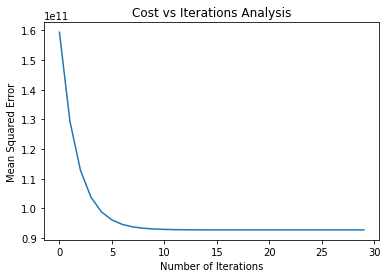

In [11]:
plt.plot(costs_tr1[:30])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

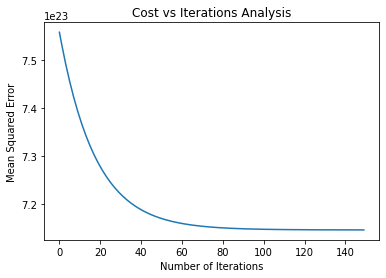

In [18]:
plt.plot(costs_tr2[:150])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

***Fase de testing:*** El modelo 1 muestra que es considerablemente generalizable con los datos de test. El modelo 2 también hace un buen trabajo pero tiene un error un poco más alto

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

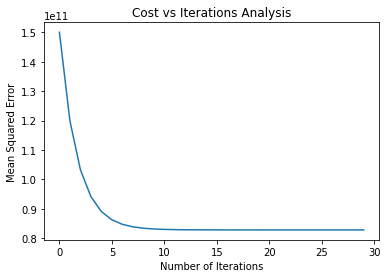

In [12]:
plt.plot(costs_te1[:30])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

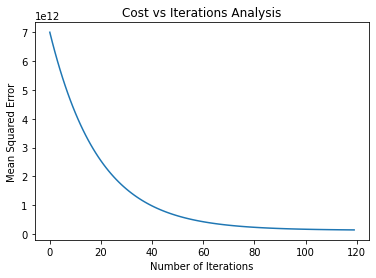

In [19]:
plt.plot(costs_te2[:120])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

***Fase de CV:*** El modelo 1 generaliza bien los datos artificialmente foráneos mientras que el modelo 2 se mantiene cerca con un error un poco más alto

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

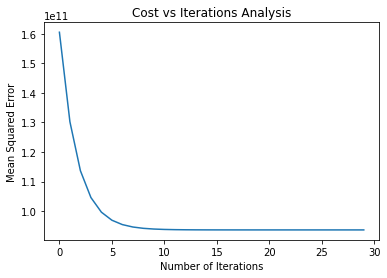

In [13]:
plt.plot(costs_cv1[:30])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

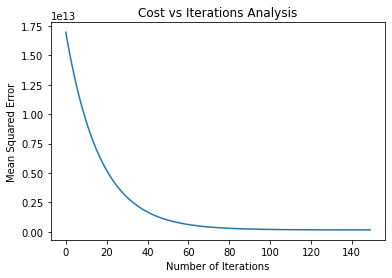

In [23]:
plt.plot(costs_cv2[:150])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')